## Q1. Import the required libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Q2.import csv file Diwali Sales Data.csv

In [2]:

df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')


## Q3. Find the shape of the data

In [3]:
df.shape


(11251, 15)

## Q4. Fetch the first five rows of the dataset

In [4]:
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Q5. Get the complete info of the dataset

In [5]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


## Q6. Drop unrelated/blank columns 'Status' and 'unnamed1'

In [6]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)


## Q7. Check for null values and find which columns have null values

In [7]:
df.isnull().sum()


User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

## Q8. Calculate the mean value of Age, Orders and Amount by using describe function

In [8]:
df[['Age', 'Orders', 'Amount']].describe()


,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Q9. Plot a bar chart for Gender and it's count 

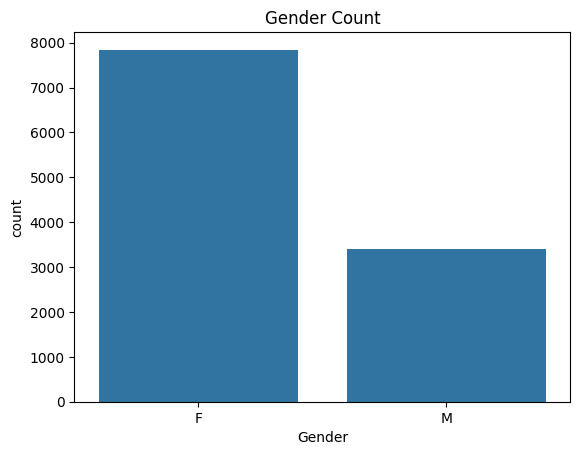

In [ ]:


sns.countplot(data=df, x='Gender')
plt.title('Gender Count')
plt.show()


## Q10. Plot a bar chart for gender vs total amount 

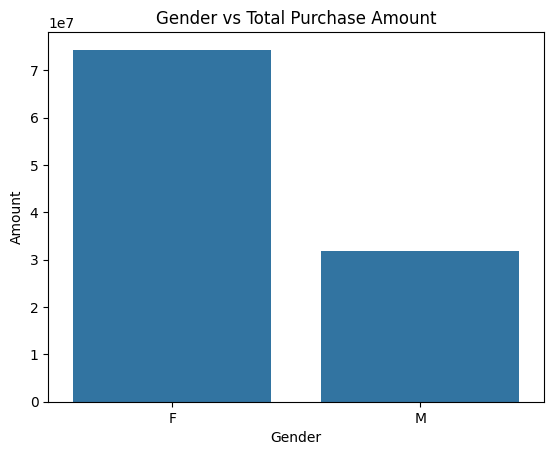

In [10]:
gender_amount = df.groupby('Gender')['Amount'].sum().reset_index()

sns.barplot(data=gender_amount, x='Gender', y='Amount')
plt.title('Gender vs Total Purchase Amount')
plt.show()


## Q11. Plot the countplot for Age Group with hue and Gender

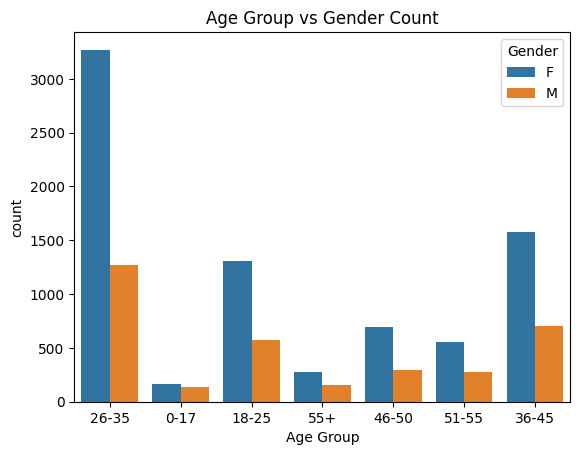

In [11]:
sns.countplot(data=df, x='Age Group', hue='Gender')
plt.title('Age Group vs Gender Count')
plt.show()


## Q12. Draw the plot for total number of orders from top 10 states 

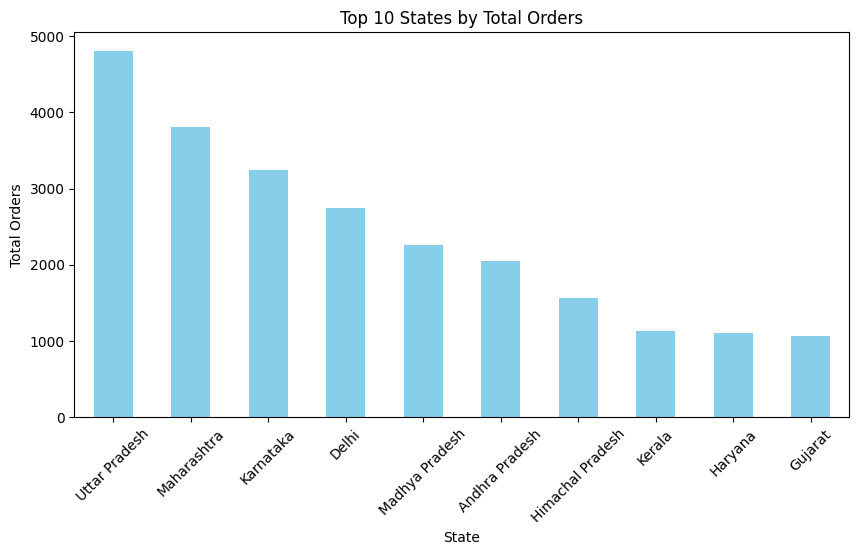

In [12]:
top_states_orders = df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10)

top_states_orders.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 10 States by Total Orders')
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()


## Q13.Draw the plot to plot total amount/sales from top 10 states

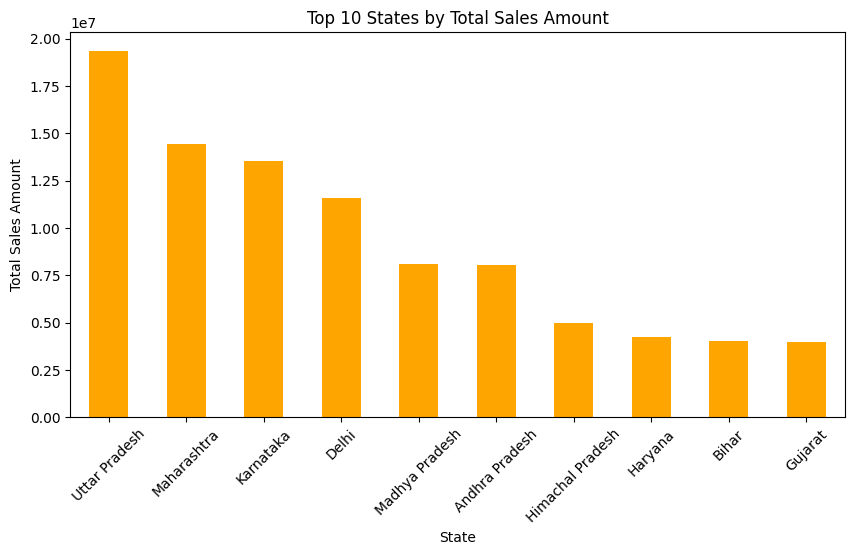

In [13]:
top_states_amount = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)

top_states_amount.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Top 10 States by Total Sales Amount')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


## Q14. Draw the plot to show the marital status 

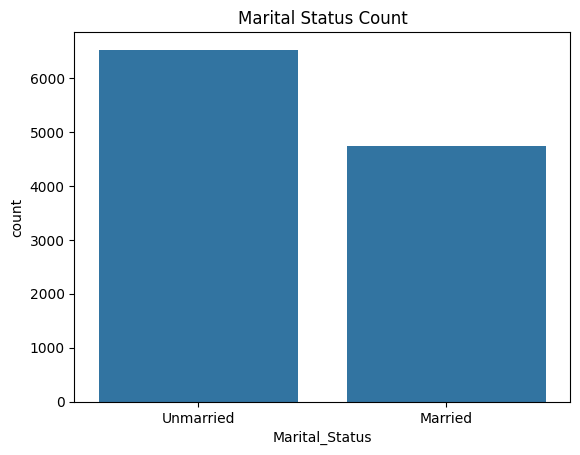

In [15]:
sns.countplot(data=df, x='Marital_Status')
plt.title('Marital Status Count')
plt.xticks([0, 1], ['Unmarried', 'Married'])
plt.show()


## Q15. Draw the plot to show the top 10 occupations

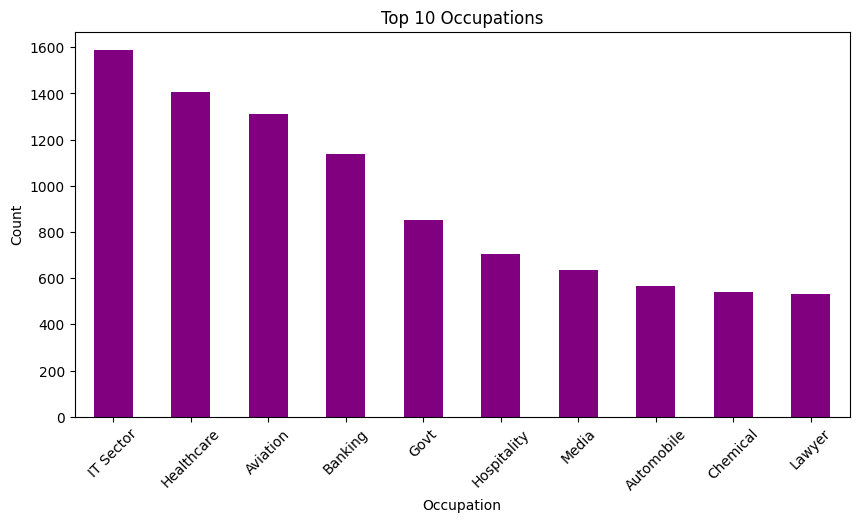

In [16]:
top_occupations = df['Occupation'].value_counts().head(10)

top_occupations.plot(kind='bar', figsize=(10, 5), color='purple')
plt.title('Top 10 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Q16. Draw the countplot to print the top 10 categories 

C:\Users\UJJWAL\AppData\Local\Temp\ipykernel_30340\1681712385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Product_Category'].isin(top_categories.index)],


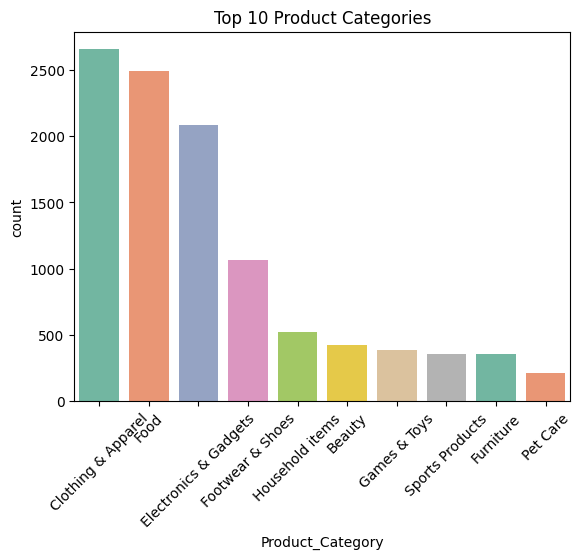

In [17]:
top_categories = df['Product_Category'].value_counts().head(10)

sns.countplot(data=df[df['Product_Category'].isin(top_categories.index)],
              x='Product_Category',
              order=top_categories.index,
              palette='Set2')

plt.title('Top 10 Product Categories')
plt.xticks(rotation=45)
plt.show()


## Q17. What is the prodct ID of the top 10 most sold products.

In [18]:
top_products = df['Product_ID'].value_counts().head(10)
print(top_products)


Product_ID
P00265242    53
P00110942    44
P00184942    37
P00237542    35
P00112142    34
P00114942    33
P00110742    32
P00145042    30
P00112542    30
P00110842    30
Name: count, dtype: int64


## Q18. What conclusion you can draw from the above visualizations. 